In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import griddata

In [3]:
test = pd.read_excel('KC9V_Test.xls')

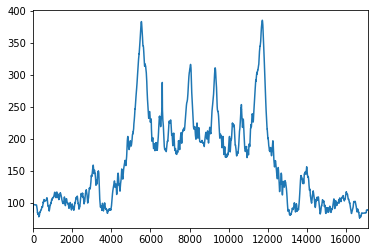

In [4]:
test = test[test.海拔>0]
test.海拔.plot()

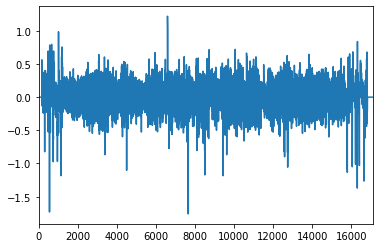

In [5]:
test['加速度'] = np.gradient(test.车速.values)/3.6
test.加速度.plot()

C:\Users\liwei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


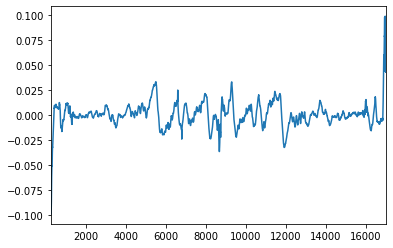

In [6]:
test['坡度'] = (test['海拔'].rolling(200).mean().diff()/test['车速'].rolling(200).mean()*3.6)
test = test[test.坡度<0.1][test.坡度>-0.1]
test.坡度.plot()

<a list of 17 text.Text objects>

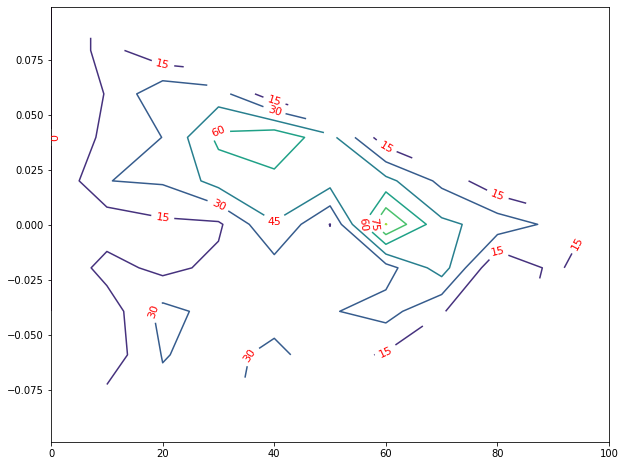

In [6]:
x=test.车速.values
y=test.坡度.values
z=test.油门踏板开度.values

xi = np.linspace(0, 100, 11)
yi = np.linspace(min(y), max(y), 11)

plt.subplots(1,1, figsize = (10,8))
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method = "linear")

C=plt.contour(xi, yi, zi)
plt.clabel(C,fontsize=11, fmt = "%1.0f", colors = "red")

plt.title('Acc Pedal')
plt.xlabel('Velocity km/h')
plt.ylable('Slope')

<a list of 11 text.Text objects>

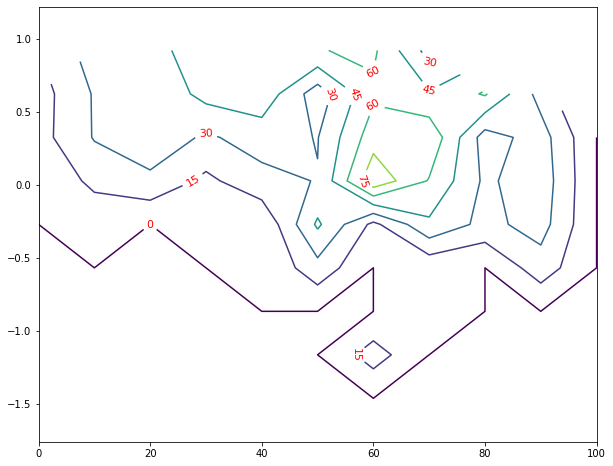

In [7]:
x=test.车速.values
y=test.加速度.values
z=test.油门踏板开度.values

xi = np.linspace(0, 100, 11)
yi = np.linspace(min(y), max(y), 11)

plt.subplots(1,1, figsize = (10,8))
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method = "linear")

C=plt.contour(xi, yi, zi)
plt.clabel(C,fontsize=11, fmt = "%1.0f", colors = "red")

In [8]:
pd.DataFrame(zi)

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,22.110207,0.000000,0.000000,NaN,NaN
3,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.378675,0.000000,0.000000,NaN
4,NaN,0.000000,0.000000,0.000000,0.395057,24.709090,0.000000,3.470814,0.000000,23.091104,0.0
5,0.000000,2.672971,0.000000,0.585511,1.563480,47.515293,11.137466,42.189624,25.524883,36.245483,0.0
6,0.000000,19.385022,27.027967,11.425087,25.504728,30.636857,86.160443,58.910423,27.200000,38.930713,0.0
7,9.202478,31.040162,38.882167,27.964055,36.128123,29.385889,68.357662,71.553712,23.193528,36.637357,0.0
8,8.463559,31.351314,32.037749,50.032412,55.505820,21.720179,57.130439,46.733455,61.635233,24.332674,NaN
9,NaN,37.415490,42.888898,48.362306,53.835714,59.309123,62.777993,23.983448,NaN,NaN,NaN
